# Esto requiere instalar Basemap

git clone https://github.com/matplotlib/basemap.git

cd basemap

pip3 install .

In [54]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [55]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [56]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [57]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [58]:
datos = df.loc[(~df['lat'].isnull()) & (~df['lng'].isnull())].copy()

In [59]:
datos['aux'] = 1

In [60]:
datos_utiles = datos.groupby([pd.cut(datos['lat'],200),pd.cut(datos['lng'],200)]).agg({"aux":"sum"}).fillna(0).reset_index()
datos_utiles.head()

,lat,lng,aux
0,"(-101.071, -99.967]","(-126.106, -124.625]",0.0
1,"(-101.071, -99.967]","(-124.625, -123.39]",0.0
2,"(-101.071, -99.967]","(-123.39, -122.156]",0.0
3,"(-101.071, -99.967]","(-122.156, -120.921]",0.0
4,"(-101.071, -99.967]","(-120.921, -119.687]",0.0


In [61]:
datos_utiles['lat'] = datos_utiles['lat'].map(lambda x: x.mid)
datos_utiles['lng'] = datos_utiles['lng'].map(lambda x: x.mid)

In [62]:
datos_utiles = datos_utiles.loc[datos_utiles['aux'] > 100]

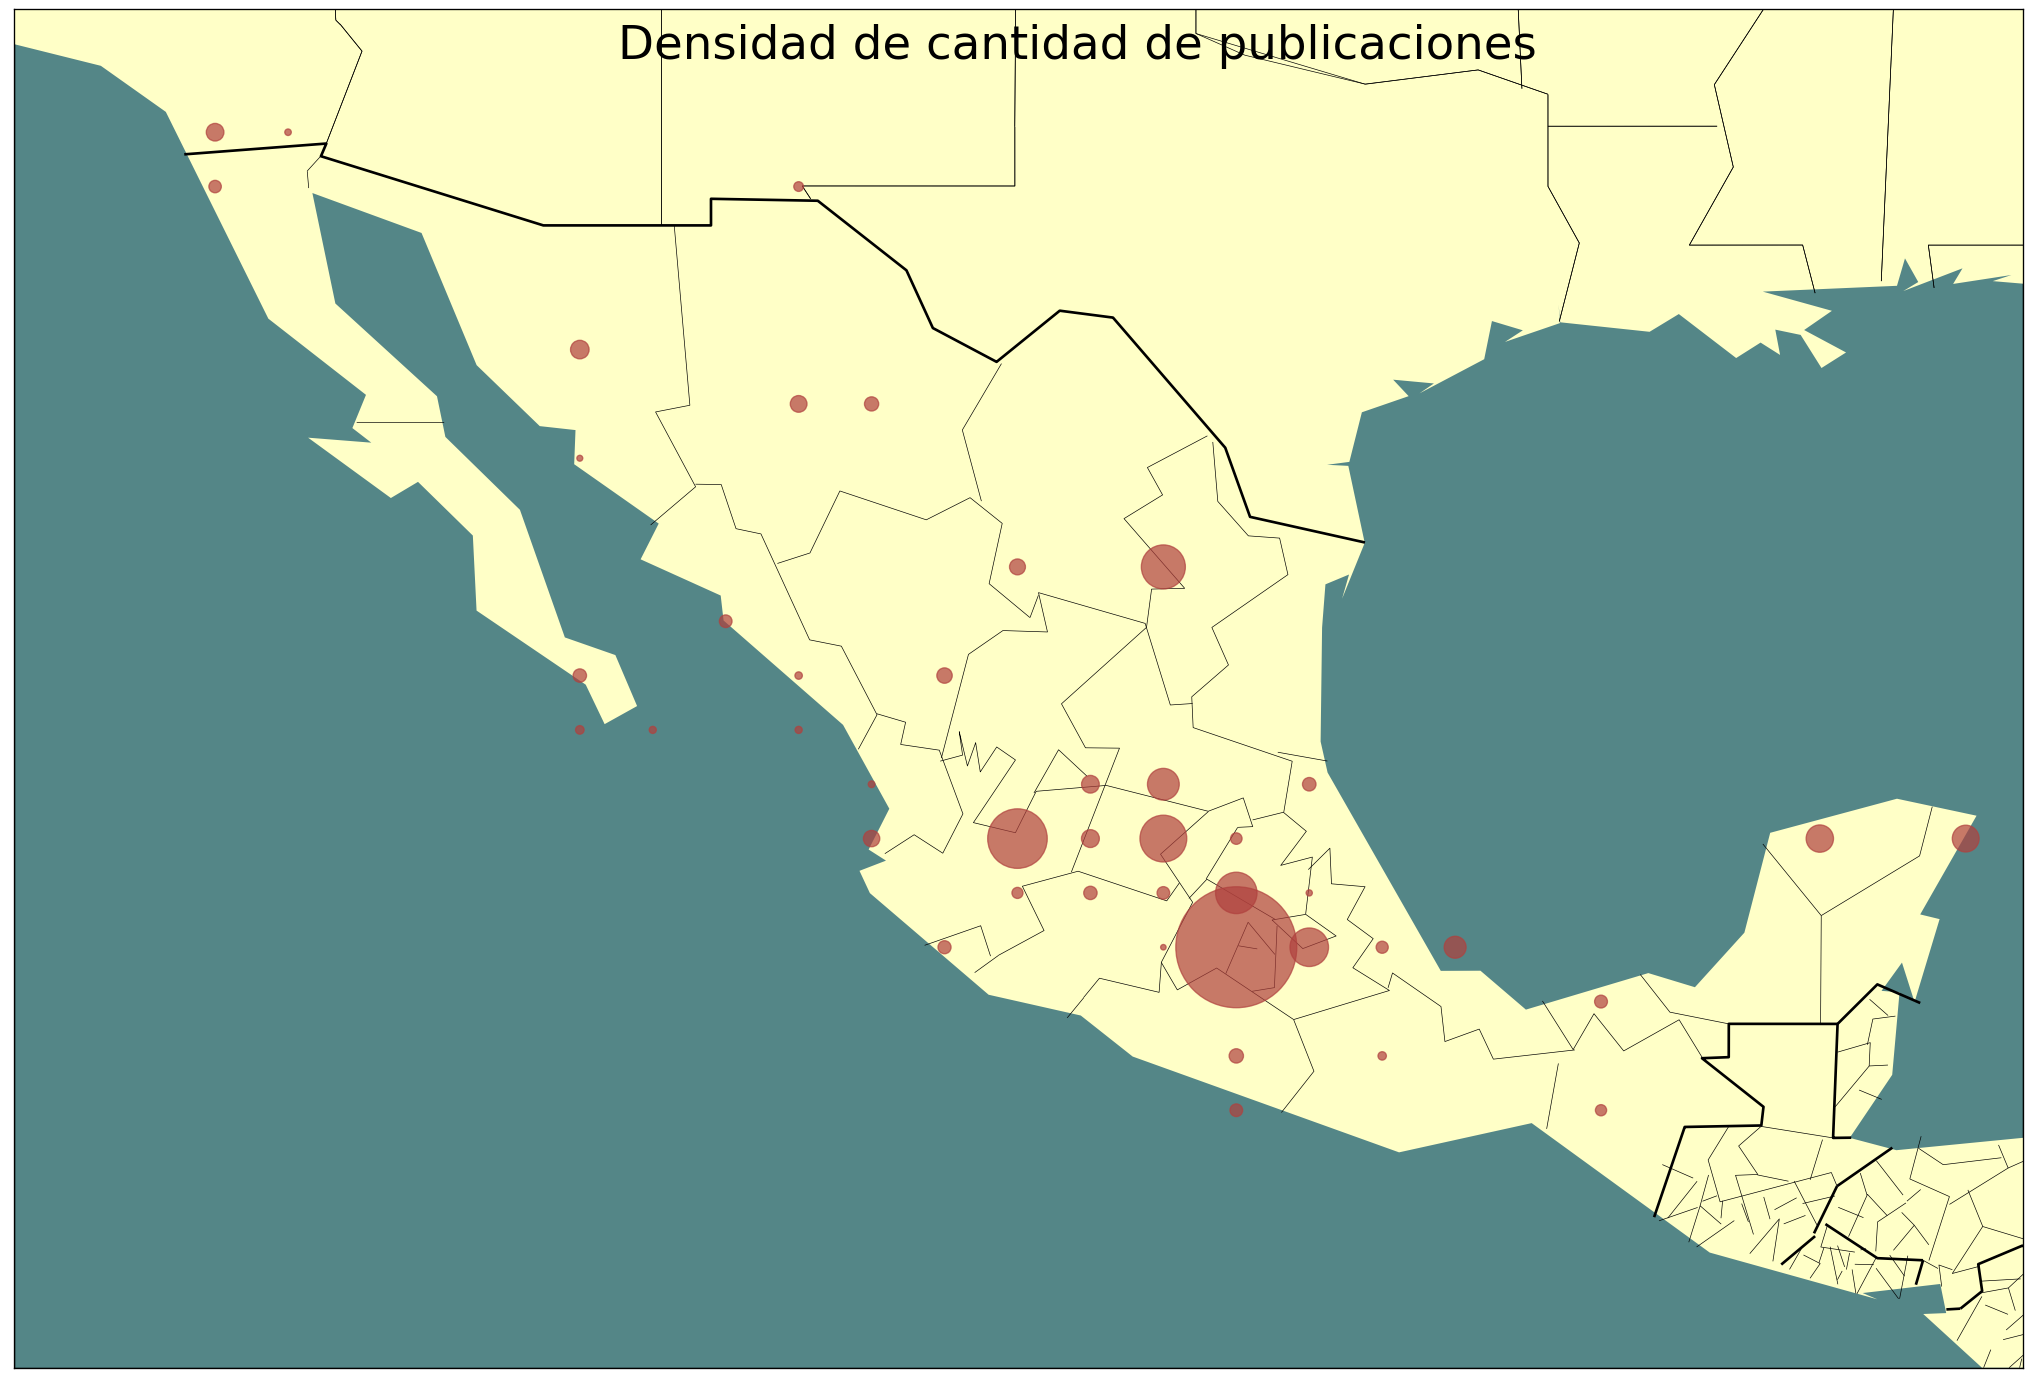

In [77]:
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

m=Basemap(llcrnrlon=-120, llcrnrlat=12,urcrnrlon=-86,urcrnrlat=35, )
m.fillcontinents(color='#FFFFC7',lake_color='aqua',zorder=1)
m.drawmapboundary(fill_color='#548687', linewidth=1)
m.drawcountries(linewidth=2)
m.drawstates()
plt.scatter(datos_utiles['lng'], datos_utiles['lat'], s=datos_utiles['aux']/6, c='#B0413E',zorder=2,alpha=0.7)

plt.text( -102, 34,'Densidad de cantidad de publicaciones', ha='center', va='bottom', size=35, color='#000000' )
plt.savefig('distribucion de propiedades.png', bbox_inches='tight')